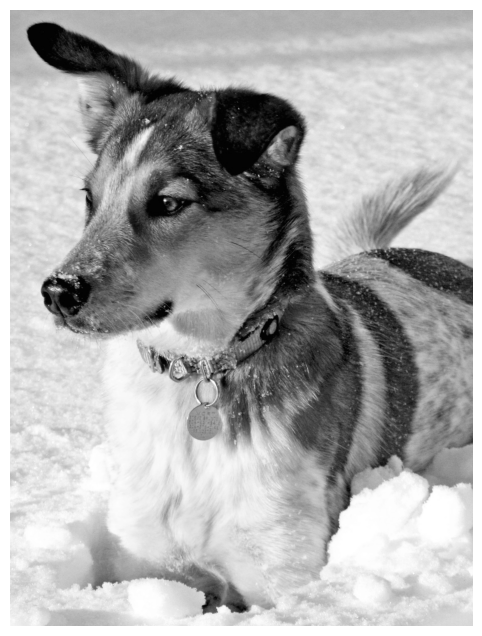

In [1]:
#1.1
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import linalg
plt.rcParams['figure.figsize'] = [16, 8]

A = imread(os.path.join('..','DATA','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [2]:
#svd
rank=10
U, S, VT = np.linalg.svd(X,full_matrices=True)
S = np.diag(S)
utu_rankr = np.dot(np.transpose(U[:,0:rank]),U[:,0:rank])
utu_rankr[utu_rankr<0.000000001] = 0
uut_rankr = np.dot(U[:,0:rank],np.transpose(U[:,0:rank]))
uut_rankr[uut_rankr<0.000000001] = 0 
print(utu_rankr)
print(uut_rankr)
#UT*U is identity matrix for any rank r and U*UT is not identity matrix

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0.0012135  0.00119587 0.00119168 ... 0.00137553 0.00137222 0.00137185]
 [0.00119587 0.00117946 0.00117595 ... 0.00135309 0.00134965 0.00134877]
 [0.00119168 0.00117595 0.00117383 ... 0.00133322 0.00132903 0.00132772]
 ...
 [0.00137553 0.00135309 0.00133322 ... 0.00232848 0.00234821 0.00235669]
 [0.00137222 0.00134965 0.00132903 ... 0.00234821 0.0023703  0.00238033]
 [0.00137185 0.00134877 0.00132772 ... 0.00235669 0.00238033 0.00239231]]


2000


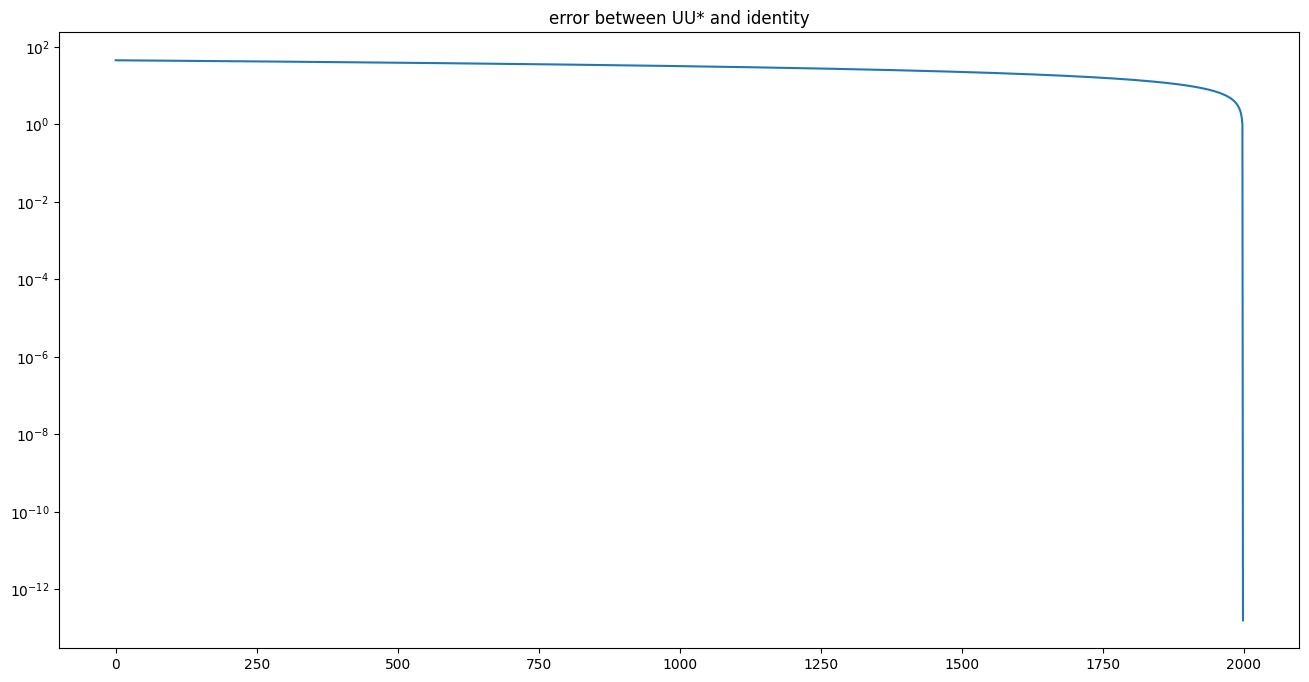

In [3]:
#plot error between U*UT and identity matrix
n = np.shape(uut_rankr)[0]
print(n)
erruut = np.zeros(n)
for i in range(n):
    uut = np.dot(U[:,0:i+1],np.transpose(U[:,0:i+1]))
    erruut[i] = linalg.norm(uut - np.identity(n), 'fro')
plt.semilogy(erruut)
plt.title('error between UU* and identity')
plt.show()

In [4]:
#1.2
#calculate economy svd and error of truncated svd
print(np.shape(X))
m = np.shape(X)[1]
rec_err = np.zeros(m)
U, S, VT = np.linalg.svd(X,full_matrices=True)
S = np.diag(S)
for r in range(m):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    rec_err[r] = linalg.norm(Xapprox-X, 'fro')

(2000, 1500)


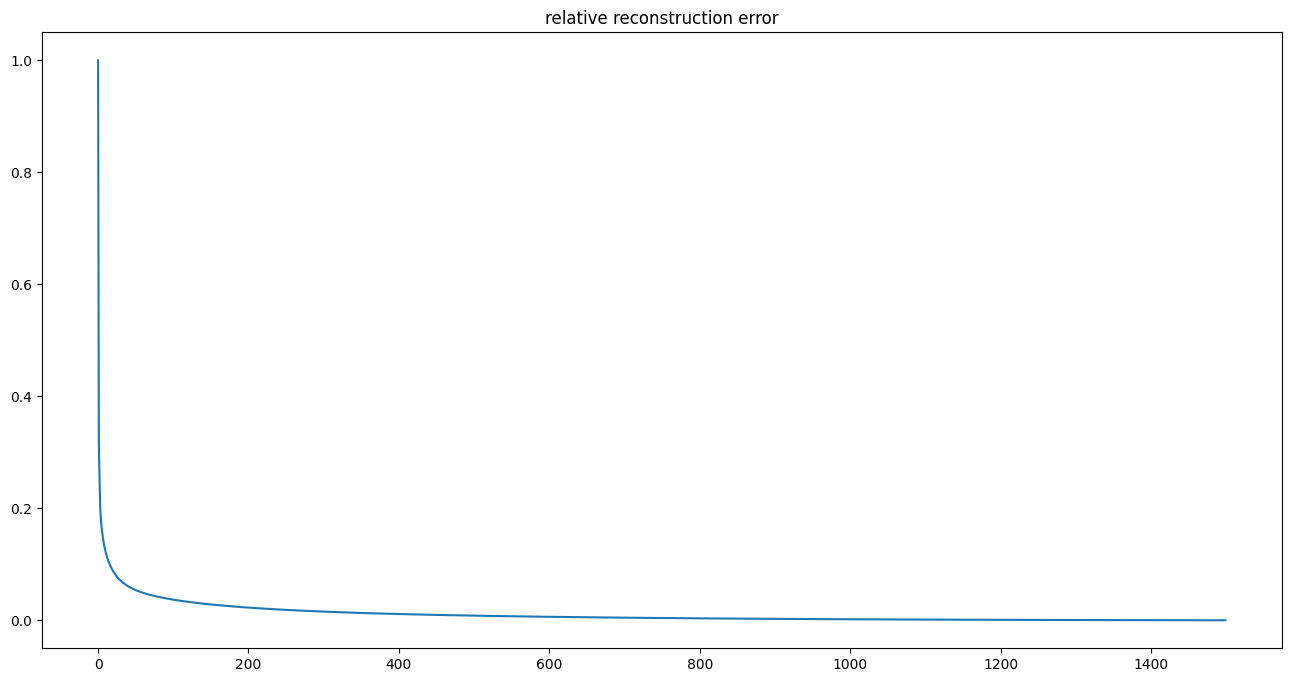

In [5]:
#relative reconstruction error
rela_err = rec_err/linalg.norm(X, 'fro')
plt.plot(rela_err)
plt.title('relative reconstruction error')
plt.show()

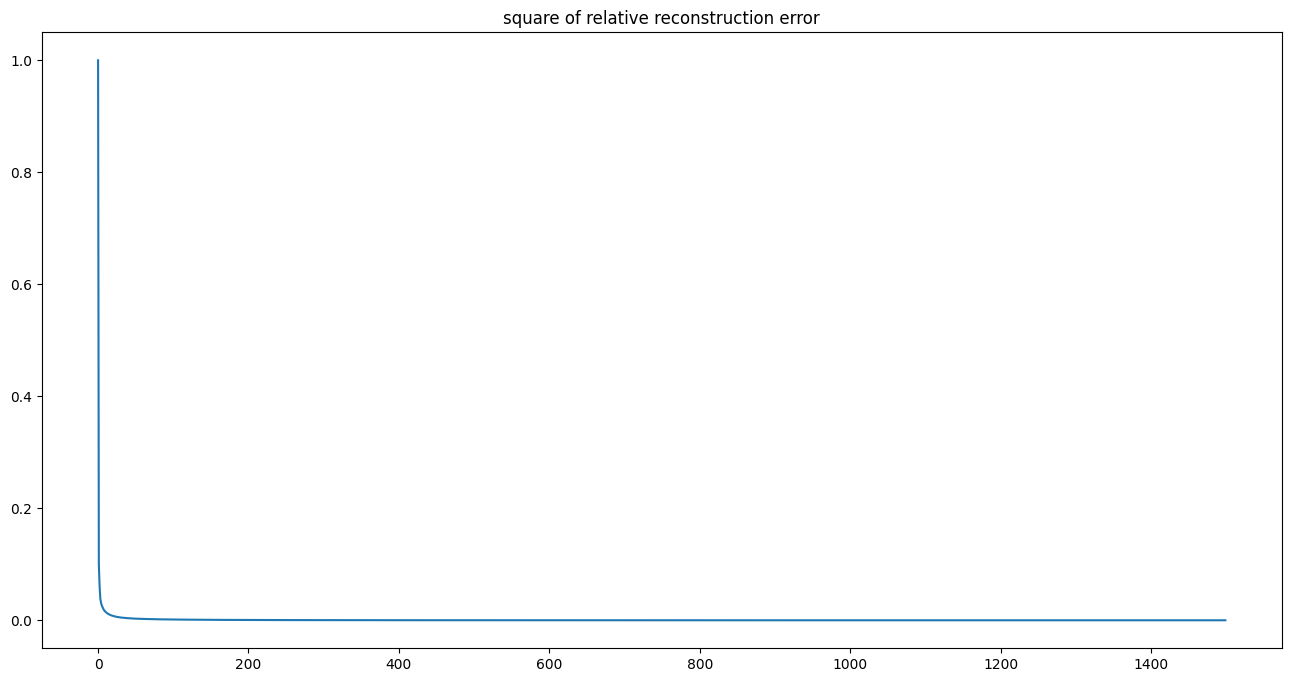

In [6]:
sqr_rela_err = np.power(rela_err,2)
plt.plot(sqr_rela_err)
plt.title('square of relative reconstruction error')
plt.show()

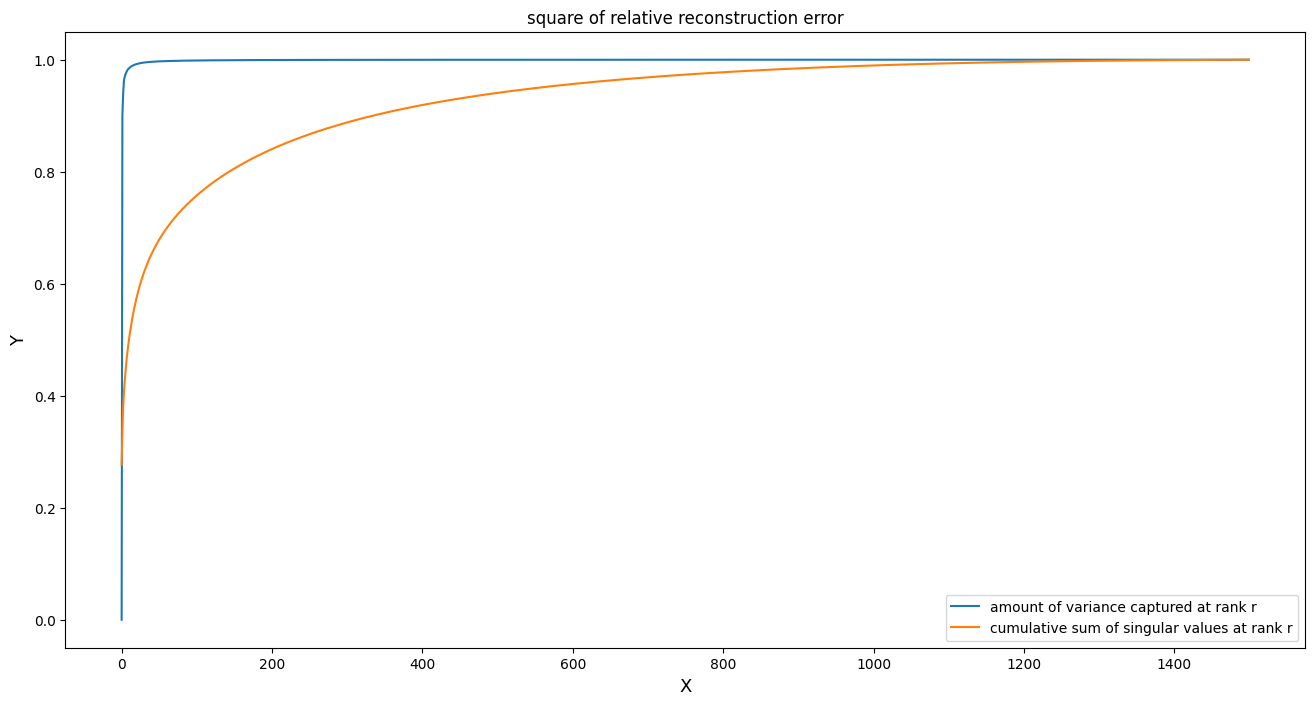

In [7]:
var_err = np.ones(len(sqr_rela_err))-sqr_rela_err
cum_singular = np.cumsum(np.diag(S))/np.sum(np.diag(S))
plt.plot(var_err, label = "amount of variance captured at rank r")
plt.plot(cum_singular, label = "cumulative sum of singular values at rank r")
plt.title('square of relative reconstruction error')
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
plt.legend()
plt.show()

In [8]:
for i in range(len(cum_singular)):
    if cum_singular[i]> 0.99:
        print("r where cumulative sum that captures 99 percent of singular value:",i)
        break

for i in range(len(var_err)):
    if var_err[i]> 0.99:
        print("r where the reconstruction capture 99 percent of total variance:",i)
        break

r where cumulative sum that captures 99 percent of singular value: 1005
r where the reconstruction capture 99 percent of total variance: 16


In [9]:
#1.3
import os
import scipy.io
mat_contents = scipy.io.loadmat(os.path.join('..','DATA','allFaces.mat'))
m = int(mat_contents['m'])
n = int(mat_contents['n'])
faces = mat_contents['faces']
faces = np.array(faces, dtype = np.float64)
#economy SVD
Uf, Sf, VTf = np.linalg.svd(faces,full_matrices=0)
eigenface = np.transpose(Uf[:,0])
face1 = np.reshape(eigenface,(m,n))

#snapshots SVD
XTX = np.dot(np.transpose(faces),faces)
eigdec = np.linalg.eig(XTX)
sigma_snap = eigdec[0]
V_snap = eigdec[1]
U_snap = np.dot(np.dot(faces, V_snap), np.linalg.inv(np.diag(sigma_snap)))

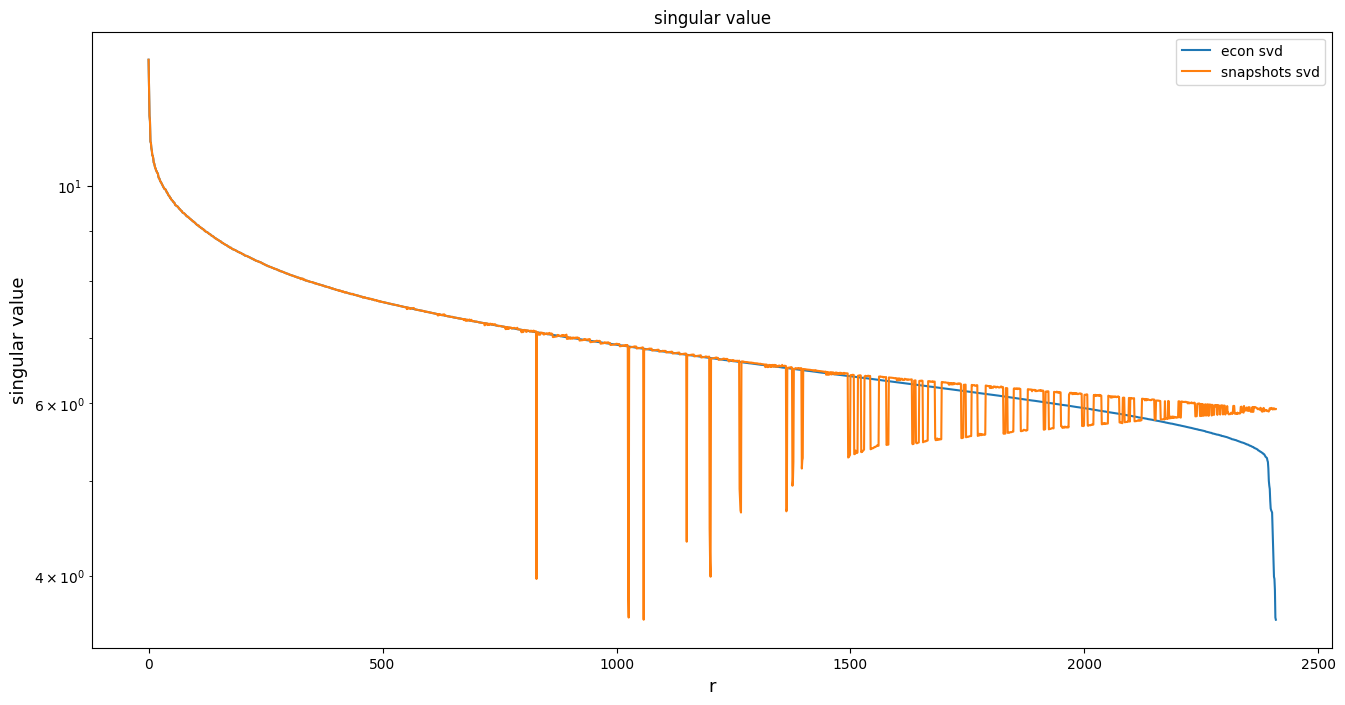

In [10]:
plt.semilogy(np.log(Sf), label = "econ svd")
plt.plot(np.log(np.sqrt(sigma_snap)), label = "snapshots svd")
plt.title('singular value')
plt.xlabel("r",fontsize=13)
plt.ylabel("singular value",fontsize=13)
plt.legend()
plt.show()

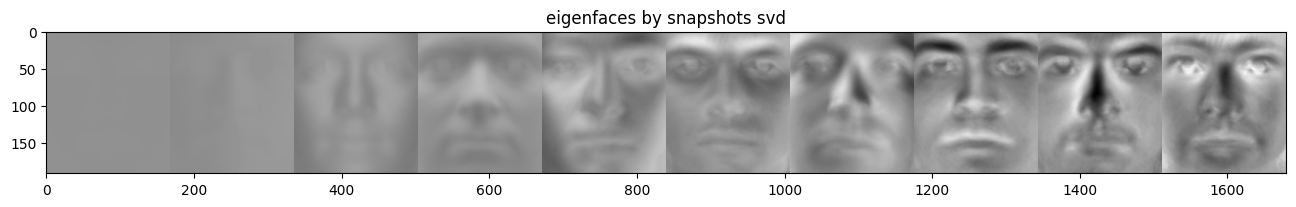

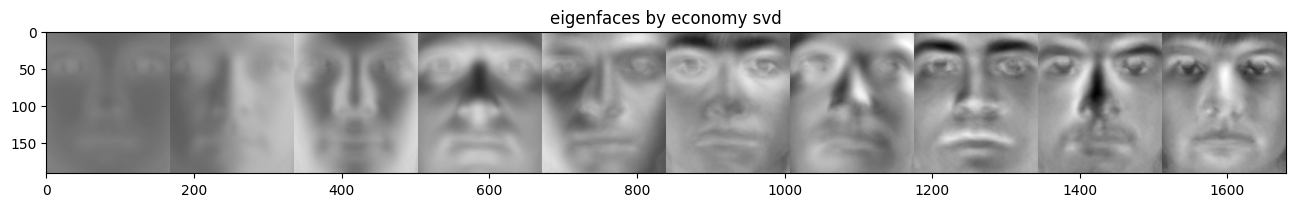

In [11]:
#Compare left 10 singular vectors using economy svd and snapshots svd
start = 0
r = 10
#snapshots eigenfaces
tenEigenVec_snap = np.zeros((n, m*(r-start)))
for j in range(r-start):
    tenEigenVec_snap[:, j*m:(j+1)*m] = np.transpose(np.reshape(U_snap[:,j+start],(m,n)))
img = plt.imshow(tenEigenVec_snap)
img.set_cmap('gray')
plt.title("eigenfaces by snapshots svd")
plt.show()
#economy eigenfaces
tenEigenVec_econ = np.zeros((n, m*r))
for j in range(r-start):
    tenEigenVec_econ[:, j*m:(j+1)*m] = np.transpose(np.reshape(Uf[:,j+start],(m,n)))
img = plt.imshow(tenEigenVec_econ)
img.set_cmap('gray')
plt.title("eigenfaces by economy svd")
plt.show()


Text(0.5, 1.0, '100*100 random matrix singular value')

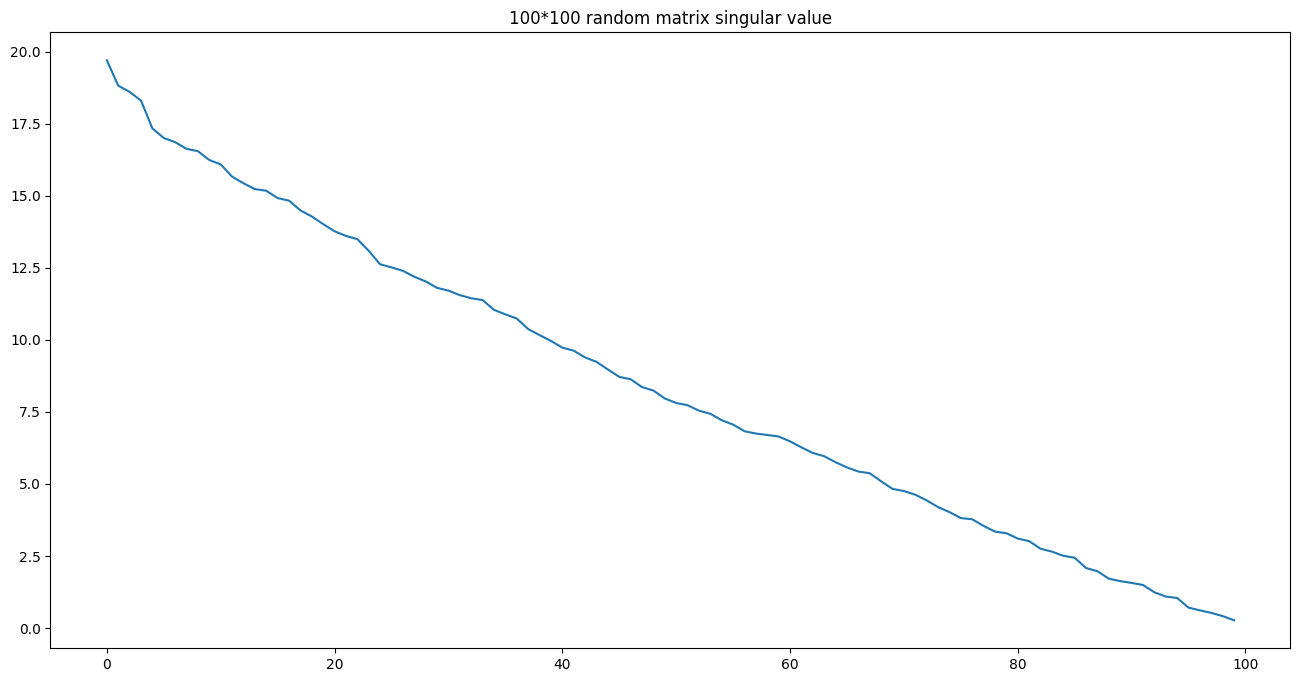

In [14]:
#1.4
#generate random matrix and compute svd
rdmatrix = np.random.normal(0,1,size=(100,100))
Urd, Srd, VTrd = np.linalg.svd(rdmatrix, full_matrices= 0)
plt.plot(Srd)
plt.title("100*100 random matrix singular value")

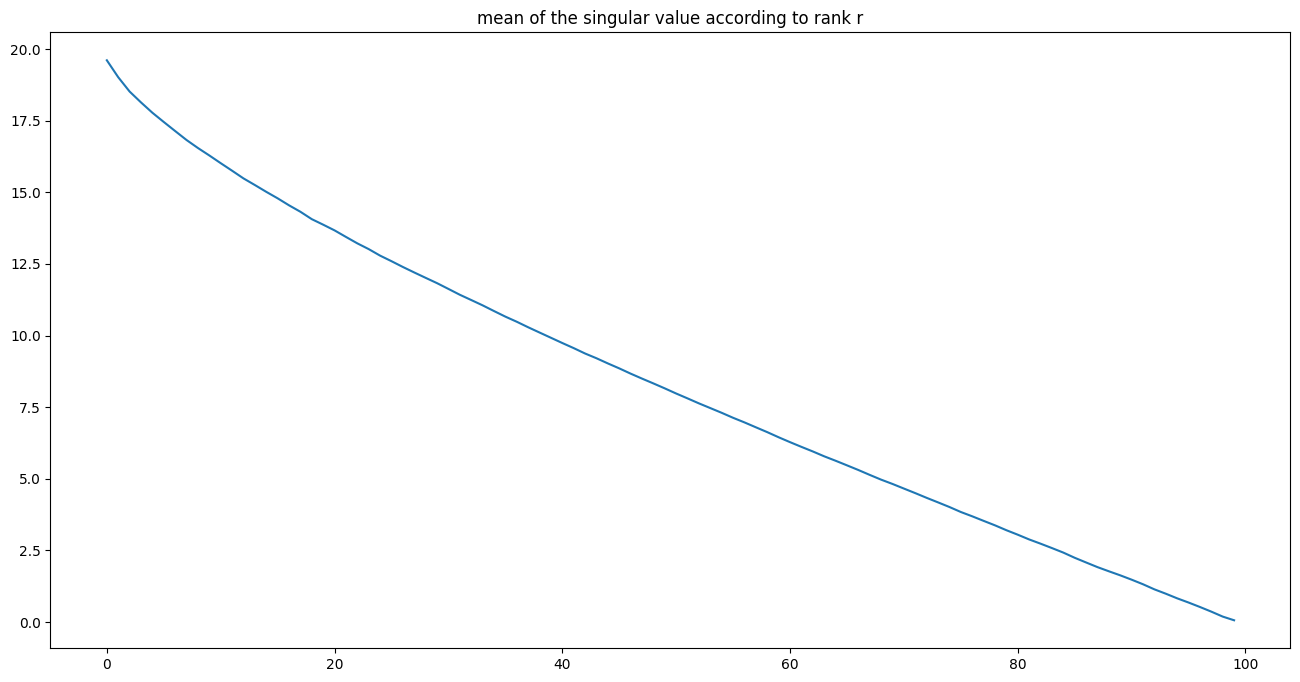

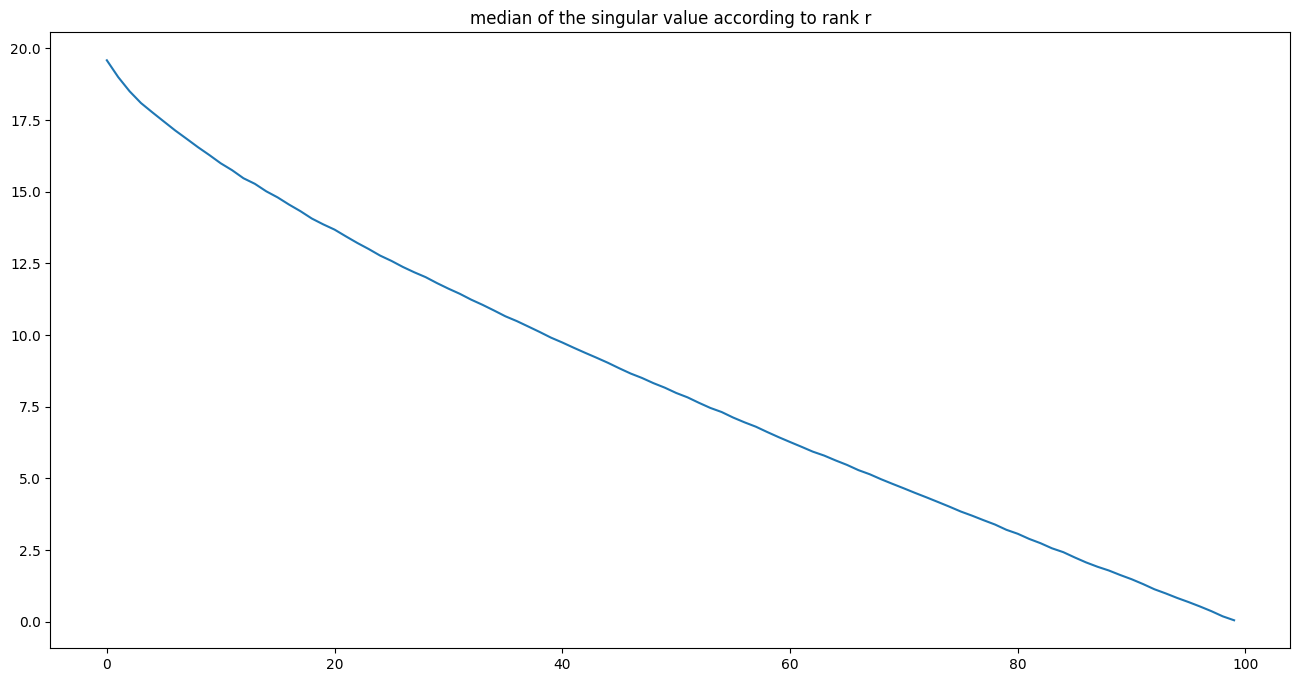

In [19]:
#repeat 100 times and calculate mean and median of singular values according to rank r
n = 100
repeat = 100
Sv = np.zeros((n,repeat))
for i in range(repeat):
    rdmatrix = np.random.normal(0,1,size=(n,n))
    Urd, Srd, VTrd = np.linalg.svd(rdmatrix, full_matrices= 0)
    Sv[:,i] = Srd
meanS = np.mean(Sv, axis = 1)
medianS = np.median(Sv, axis=1)
plt.plot(meanS)
plt.title("mean of the singular value according to rank r")
plt.show()
plt.plot(medianS)
plt.title("median of the singular value according to rank r")
plt.show()


4
1
2
3
4


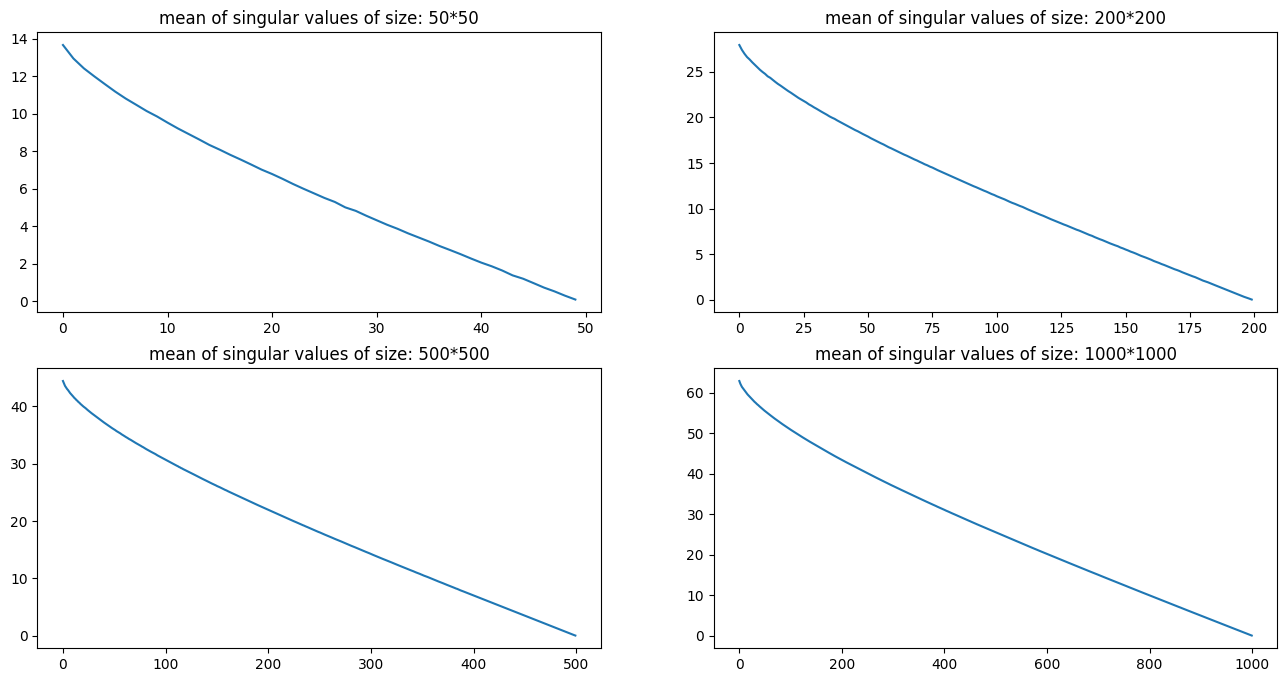

In [48]:
#repeat size 50*50, 200*200, 500*500, 1000*1000
matrix_size = [50,200,500,1000]
idx = 1
repeat = 100
print(len(matrix_size))
for size in matrix_size:
    print(idx)
    Sv = np.zeros((repeat, size))
    for i in range(repeat):
        rdmatrix = np.random.normal(0,1,size=(size,size))
        Urd, Srd, VTrd = np.linalg.svd(rdmatrix, full_matrices= 0)
        Sv[i,:] = Srd
    meanS = np.median(Sv, axis=0)
    plt.subplot(2, 2, idx)
    plt.plot(np.arange(size),meanS)
    plt.title('mean of singular values of size: ' + str(size) + '*' + str(size))
    idx = idx + 1

plt.show()

In [31]:
range(0,10, 1)

range(0, 10)